In [1]:

# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display it
import numpy as np # linear algebra
import pandas as pd # data processing
df = pd.read_csv('household_power_consumption_2010.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, keep_date_col = True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
print('The shape of our features is:', df.shape)


The shape of our features is: (257583, 9)


In [2]:
df = df.assign(avg=df.loc[:, ["Global_active_power", "Global_reactive_power"]].mean(axis=1))

In [3]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,avg
count,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000
mean,0.934322,0.137472,241.128671,3.985442,0.926659,0.995557,6.040724,0.535897
std,0.858532,0.118183,2.628380,3.606815,5.426155,4.412561,8.242336,0.447890
min,0.138000,0.000000,225.320000,0.600000,0.000000,0.000000,0.000000,0.070000
25%,0.304000,0.058000,239.630000,1.400000,0.000000,0.000000,0.000000,0.195000
50%,0.514000,0.106000,241.150000,2.400000,0.000000,0.000000,1.000000,0.356000
75%,1.406000,0.206000,242.630000,5.800000,0.000000,1.000000,17.000000,0.768000
max,9.724000,1.108000,253.530000,43.000000,81.000000,76.000000,31.000000,4.893000


In [4]:
import matplotlib.pyplot as plt
from sklearn import linear_model


In [5]:
X = df['Global_active_power'].values.reshape(-1,1)
y = df['avg'].values


In [6]:
Xdf=pd.DataFrame(X)

In [7]:
Xdf.dropna(inplace=True)

In [8]:
pd.isnull(Xdf).sum()

0    0
dtype: int64

In [9]:
X=Xdf.to_numpy()

In [10]:
ydf=pd.DataFrame(y)

In [11]:
ydf.dropna(inplace=True)

In [12]:
pd.isnull(ydf).sum()

0    0
dtype: int64

In [13]:
y=ydf.to_numpy()

In [14]:
# Train

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)


In [15]:
# Evaluate

r2 = model.score(X, y)


Text(0.5, 1.0, '$R^2= 0.98$')

C:\Users\maria\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


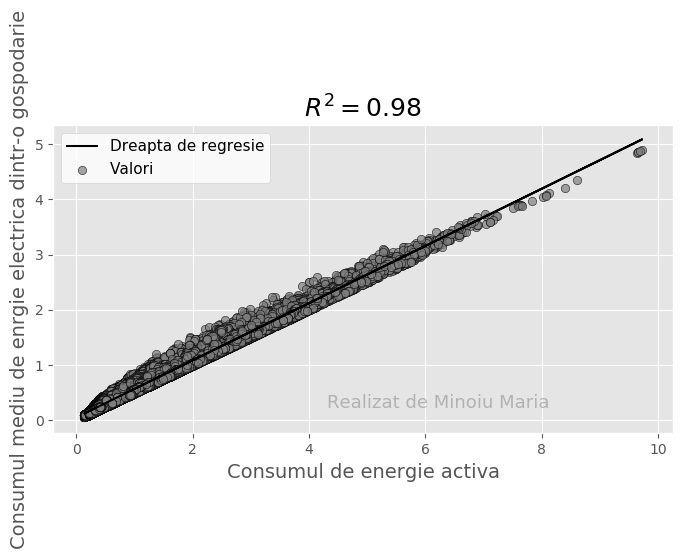

In [16]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Dreapta de regresie')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Valori')
ax.set_ylabel('Consumul mediu de enrgie electrica dintr-o gospodarie', fontsize=14)
ax.set_xlabel('Consumul de energie activa', fontsize=14)
ax.text(0.8, 0.1, 'Realizat de Minoiu Maria', fontsize=13, ha='right', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

In [17]:

X = df[['Global_intensity', 'Global_active_power']].values.reshape(-1,2)
Y = df['avg']

In [18]:
# Prepare model data point for visualization

x = X[:, 0]
y = X[:, 1]
z = Y

In [19]:
x_pred = np.linspace(6, 24, 30)   
y_pred = np.linspace(0, 100, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [20]:
Xdff=pd.DataFrame(X)
Ydff=pd.DataFrame(Y)


In [21]:
Xdff.dropna(inplace=True)
Ydff.dropna(inplace=True)

In [22]:
X=Xdff.to_numpy()
Y=Ydff.to_numpy()

In [23]:
# Train 

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)


In [24]:
# Evaluate 

r2 = model.score(X, Y)


In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

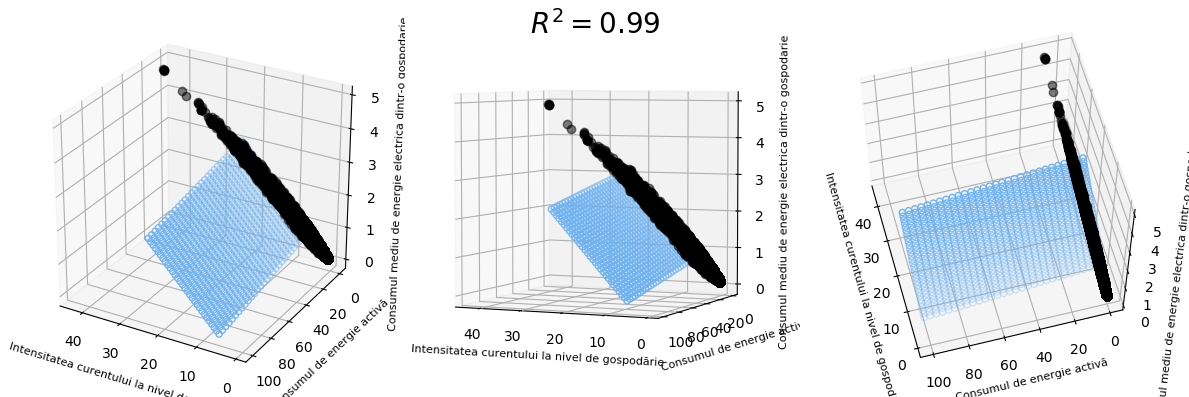

In [26]:
# Plot 

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Intensitatea curentului la nivel de gospodărie', fontsize=8)
    ax.set_ylabel('Consumul de energie activă', fontsize=8)
    ax.set_zlabel('Consumul mediu de energie electrica dintr-o gospodarie', fontsize=8)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
from sklearn import linear_model


In [27]:
features = ['Global_intensity', 'Global_active_power','Voltage']
target = 'avg'

In [28]:
X = df[features].values.reshape(-1, len(features))
y = df[target].values

In [29]:
Xdff=pd.DataFrame(X)
Ydff=pd.DataFrame(y)


In [30]:
Xdff.dropna(inplace=True)
Ydff.dropna(inplace=True)

In [31]:
X=Xdff.to_numpy()
y=Ydff.to_numpy()

In [32]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
print(model.coef_)
print(model.intercept_)


[[ 0.1308465  -0.02799723  0.00254553]]
[-0.57322695]


In [33]:
print(model.score(X, y))
x_pred = np.array([20, 30000, 9000])
x_pred = x_pred.reshape(-1, len(features))
print(model.predict(x_pred))

0.9874244913313314
[[-814.96345437]]
